In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
colors_ns = {
    1: 'r',
    2: 'm',
    3: 'b',
    4: 'k',
    5: 'g'
}

In [11]:
def filter_df_by_n(df, filter_statement, ns, sorting_column):
    result = {}
    
    for n in ns:
        result[n] = df[filter_statement & (df['n'] == n[0]) & (df['l'] == n[1])]
        result[n] = result[n].sort_values([sorting_column])
    
    return result

In [12]:
def make_n_list(df, ns, filter_statement, sorting_column):
    result = {}
    
    for n in ns:
        result[n] = df[filter_statement & (df['n'] == n)]
        result[n] = result[n].sort_values([sorting_column])
    
    return result

In [13]:
def filter_df(df, filter_statement, sorting_column):
    result = df[filter_statement]
    result = result.sort_values([sorting_column])
    
    return result

In [14]:
def plot_layers(dataframe, reference_dataframe, ns, num_nodes, ref_train=256, ref_nodes=None):
    if ref_nodes is None:
        ref_nodes = num_nodes
    
    pinn_statement = (dataframe['num_nodes'] == num_nodes)
    reference_statement = (reference_dataframe['num_nodes'] == ref_nodes) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_dense')
    data_ref = filter_df_by_n(reference_dataframe, reference_statement, ns, 'num_dense')

    for n in ns:
        plt.plot(data_pinn[n]['num_dense'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n[0]]), label='n, l = {}, {}'.format(*n))
        plt.plot(data_ref[n]['num_dense'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n[0]]), label='n, l = {}, {}, reference'.format(*n))
    
    plt.xlabel('number of layers')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('layers.png')

In [15]:
def plot_nodes(dataframe, reference_dataframe, ns, num_dense, ref_train=256):
    pinn_statement = (dataframe['num_dense'] == num_dense)
    ref_statement = (reference_dataframe['num_dense'] == num_dense) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_nodes')
    data_ref = filter_df_by_n(reference_dataframe, ref_statement, ns, 'num_nodes')
    
    for n in ns:
        plt.plot(data_pinn[n]['num_nodes'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n[0]]), label='n, l = {}, {}'.format(*n))
        plt.plot(data_ref[n]['num_nodes'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n[0]]), label='n, l = {}, {}, reference'.format(*n))
    
    plt.xlabel('number of nodes per layer')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('nodes.png')

In [21]:
df_function = pd.read_csv('function.csv')
df_pde = pd.read_csv('pde.csv')

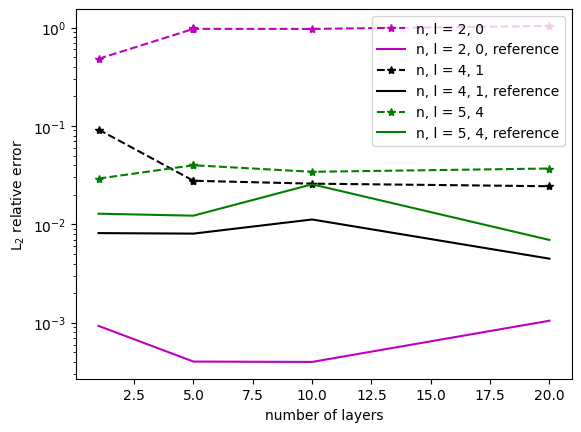

In [19]:
plot_layers(df_pde, df_function, [(2, 0), (4, 1), (5, 4)], 60)

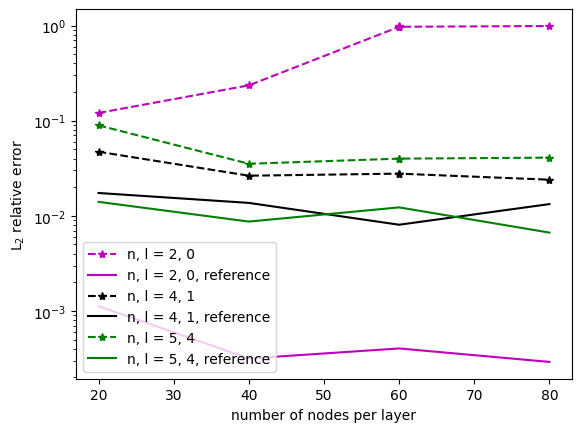

In [20]:
plot_nodes(df_pde, df_function, [(2, 0), (4, 1), (5, 4)], 5)

In [22]:
def extract_n_serie(df, num_dense, num_nodes):
    filter_statement = (df['num_dense'] == num_dense) & (df['num_nodes'] == num_nodes)
    df_filtered = filter_df(df, filter_statement, 'l')
    return df_filtered

In [23]:
filter_statement = (df_pde['num_dense'] == 5) & (df_pde['num_nodes'] == 40)
nxs_pde = make_n_list(df_pde, [1, 2, 3, 4, 5], filter_statement, 'l')

filter_ref = (df_function['num_dense'] == 5) & (df_function['num_nodes'] == 40)
nxs_ref = make_n_list(df_function, [1, 2, 3, 4, 5], filter_ref, 'l')

In [24]:
def plot_n_graph(df_pde, df_ref, n):
    plt.figure()

    plt.plot(df_pde[n]['l'], df_pde[n]['test_metric'], '*--', label='PINN for fixed n, l')
    plt.plot(df_ref[n]['l'], df_ref[n]['test_metric'], '*-', label='reference')
    
    plt.title('n = {}'.format(n))
    plt.xlabel('l')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('ns-{}.png'.format(n))

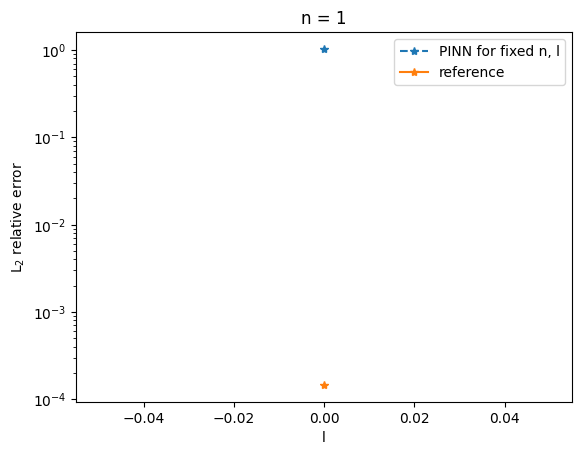

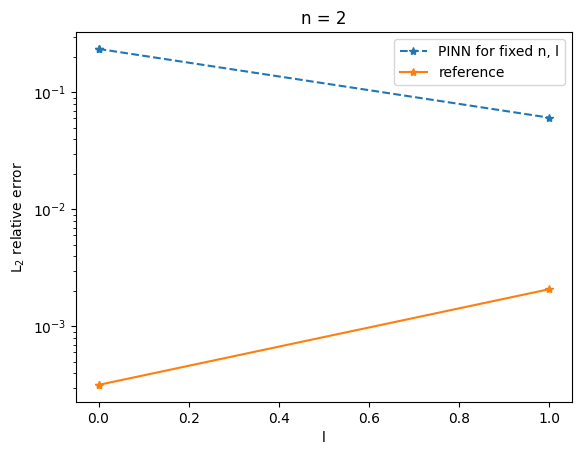

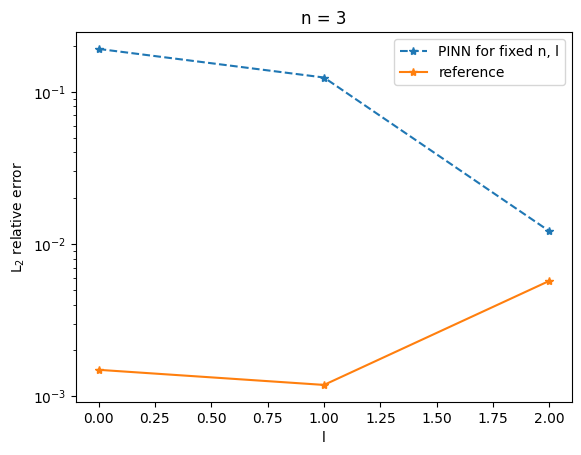

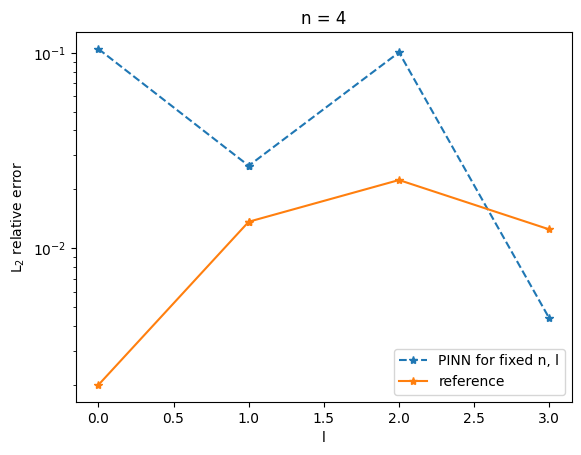

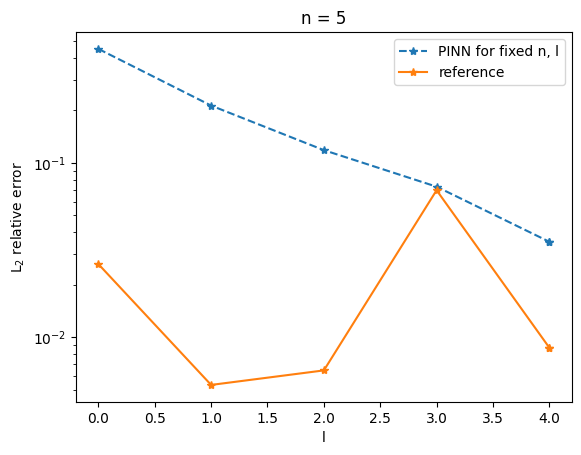

In [25]:
for i in range(1, 6):
    plot_n_graph(nxs_pde, nxs_ref, i)